# Solar energy - Clustering of countries

In [17]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 300

import warnings
warnings.filterwarnings("ignore")

In [18]:
path = "../../../datasets/_classified/kaggle/"

In [19]:
df_solar_co = pd.read_csv(path + "solar_generation_by_country.csv")
df_solar_co.head(2)

,AT,BE,BG,CH,CY,CZ,DE,DK,EE,ES,FI,FR,EL,HR,HU,IE,IT,LT,LU,LV,NL,NO,PL,PT,RO,SI,SK,SE,UK
0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df_solar_co.columns

Index(['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR',
       'EL', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'NL', 'NO', 'PL', 'PT',
       'RO', 'SI', 'SK', 'SE', 'UK'],
      dtype='object')

In [43]:
country_dict = {
'AT': 'Austria',
'BE': 'Belgium',
'BG': 'Bulgaria',
'CH': 'Switzerland',
'CY': 'Cyprus',
'CZ': 'Czech Republic',
'DE': 'Germany',
'DK': 'Denmark',
'EE': 'Estonia',
'ES': 'Spain',
'FI': 'Finland',
'FR': 'France',
'EL': 'Greece',
'UK': 'UK',
'HU': 'Hungary',
'HR': 'Croatia',
'IE': 'Ireland',
'IT': 'Italy',
'LT': 'Lithuania',
'LU': 'Luxembourg',
'LV': 'Latvia',
'NO': 'Norway',
'NL': 'Netherlands',
'PL': 'Poland',
'PT': 'Portugal',
'RO': 'Romania',
'SE': 'Sweden',
'SI': 'Slovenia',
'SK': 'Slovakia'
    }

In [27]:
len(df_solar_co.columns)

29

In [20]:
df_solar_st = pd.read_csv(path + "solar_generation_by_station.csv")
df_solar_st.tail(2)

,time_step,AT11,AT21,AT12,AT31,AT32,AT22,AT33,AT34,AT13,BE21,BE31,BE32,BE33,BE22,BE34,BE35,BE23,BE10,BE24,BE25,BG32,BG33,BG31,BG34,BG41,BG42,CZ06,CZ03,CZ08,CZ01,CZ05,CZ04,CZ02,CZ07,DEA5,DE30,DE40,DE91,DE50,DED1,DE71,DEE1,DEA4,DED2,DEA1,DE13,DE72,DEE2,DE60,DE92,DE12,DE73,DEB1,DEA2,DED3,DE93,DEE3,DE80,DE25,DEA3,DE22,DE21,DE24,DE23,DEB3,DEF0,DE27,DE11,DEG0,DEB2,DE14,DE26,DE94,ES61,ES24,ES12,ES13,ES41,ES42,ES51,ES30,ES52,ES43,ES11,ES53,ES23,ES22,ES21,ES62,FI20,FI1C,FI1D,FI1B,FI19,FR42,FR61,FR72,FR25,FR26,FR52,FR24,FR21,FR83,FR43,FR23,FR10,FR81,FR63,FR41,FR62,FR30,FR51,FR22,FR53,FR82,FR71,EL51,EL30,EL63,EL53,EL62,EL54,EL52,EL43,EL42,EL65,EL64,EL61,EL41,HU33,HU23,HU32,HU31,HU21,HU10,HU22,CH02,CH03,CH05,CH01,CH07,CH06,CH04,IE01,IE02,ITF1,ITF5,ITF6,ITF3,ITH5,ITH4,ITI4,ITC3,ITC4,ITI3,ITF2,ITC1,ITF4,ITG2,ITG1,ITI1,ITH2,ITI2,ITC2,ITH3,NL13,NL23,NL12,NL22,NL11,NL42,NL41,NL32,NL21,NL31,NL34,NL33,NO04,NO02,NO01,NO03,NO05,PL51,PL61,PL31,PL43,PL11,PL21,PL12,PL52,PL32,PL34,PL63,PL22,PL33,PL62,PL41,PL42,PT18,PT15,PT16,PT17,PT11,RO32,RO12,RO21,RO11,RO31,RO22,RO41,RO42,SE32,SE31,SE12,SE33,SE21,SE11,SE22,SE23,SK01,SK03,SK04,SK02,UKH2,UKJ1,UKD6,UKK3,UKD1,UKF1,UKK4,UKK2,UKH1,UKE1,UKL2,UKM2,UKH3,UKK1,UKD3,UKJ3,UKG1,UKM6,UKI3UKI4,UKJ4,UKD4,UKF2,UKF3,UKD7,UKM5,UKE2,UKN0,UKC2,UKI5UKI6,UKG2,UKM3,UKE3,UKJ2,UKC1,UKG3,UKL1,UKE4
262966,262967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262967,262968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df_solar_st = df_solar_st.drop(columns=['time_step'])
len(df_solar_st.columns)

260

---

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## On stations

In [23]:
df_solar_transposed = df_solar_st[-24*365:].T
df_solar_transposed.tail(2)

,254208,254209,254210,254211,254212,254213,254214,254215,254216,254217,254218,254219,254220,254221,254222,254223,254224,254225,254226,254227,254228,254229,254230,254231,254232,254233,254234,254235,254236,254237,254238,254239,254240,254241,254242,254243,254244,254245,254246,254247,254248,254249,254250,254251,254252,254253,254254,254255,254256,254257,254258,254259,254260,254261,254262,254263,254264,254265,254266,254267,254268,254269,254270,254271,254272,254273,254274,254275,254276,254277,254278,254279,254280,254281,254282,254283,254284,254285,254286,254287,254288,254289,254290,254291,254292,254293,254294,254295,254296,254297,254298,254299,254300,254301,254302,254303,254304,254305,254306,254307,254308,254309,254310,254311,254312,254313,254314,254315,254316,254317,254318,254319,254320,254321,254322,254323,254324,254325,254326,254327,254328,254329,254330,254331,254332,254333,254334,254335,254336,254337,254338,254339,254340,254341,254342,254343,254344,254345,254346,254347,254348,254349,254350,254351,254352,254353,254354,254355,254356,254357,...,262818,262819,262820,262821,262822,262823,262824,262825,262826,262827,262828,262829,262830,262831,262832,262833,262834,262835,262836,262837,262838,262839,262840,262841,262842,262843,262844,262845,262846,262847,262848,262849,262850,262851,262852,262853,262854,262855,262856,262857,262858,262859,262860,262861,262862,262863,262864,262865,262866,262867,262868,262869,262870,262871,262872,262873,262874,262875,262876,262877,262878,262879,262880,262881,262882,262883,262884,262885,262886,262887,262888,262889,262890,262891,262892,262893,262894,262895,262896,262897,262898,262899,262900,262901,262902,262903,262904,262905,262906,262907,262908,262909,262910,262911,262912,262913,262914,262915,262916,262917,262918,262919,262920,262921,262922,262923,262924,262925,262926,262927,262928,262929,262930,262931,262932,262933,262934,262935,262936,262937,262938,262939,262940,262941,262942,262943,262944,262945,262946,262947,262948,262949,262950,262951,262952,262953,262954,262955,262956,262957,262958,262959,262960,262961,262962,262963,262964,262965,262966,262967
UKL1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00454,0.03268,0.03582,0.03150,0.03397,0.01626,0.00882,0.00228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06154,0.21109,0.31614,0.38716,0.43612,0.28436,0.12670,0.00333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02394,0.03295,0.03424,0.09291,0.14847,0.14145,0.08795,0.0051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03058,0.14815,0.23625,0.25697,0.19358,0.09569,0.03562,0.00691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01195,0.03161,0.04202,0.05229,0.03885,0.02274,0.02475,0.00777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04288,0.11208,0.23709,0.30366,0.33393,0.25748,0.11807,0.00818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01058,0.01703,0.05131,0.03971,0.05035,0.03112,0.00590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04350,0.13731,0.12993,0.08754,0.10142,0.03618,0.01122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00540,0.01848,0.02360,0.02316,0.05459,0.09607,0.02429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06691,0.18368,0.25561,0.27386,0.15795,0.13123,0.05063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00780,0.01089,0.02214,0.03015,0.03136,0.03555,0.02274,0.00038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02876,0.06367,0.05851,0.05175,0.02705,0.05831,0.04033,0.00142,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UKE4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00422,0.05240,0.05711,0.06402,0.07822,0.07162,0.00393,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06132,0.22173,0.31866,0.34098,0.26557,0.23731,0.04649,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00084,0.01680,0.0070

In [28]:
def plot_elbow_scores(df_, cluster_nb):
    km_inertias, km_scores = [], []

    for k in range(2, cluster_nb):
        km = KMeans(n_clusters=k).fit(df_)
        km_inertias.append(km.inertia_)
        km_scores.append(silhouette_score(df_, km.labels_))

    sns.lineplot(range(2, cluster_nb), km_inertias)
    plt.title('elbow graph / inertia depending on k')
    plt.show()

    sns.lineplot(range(2, cluster_nb), km_scores)
    plt.title('scores depending on k')
    plt.show()

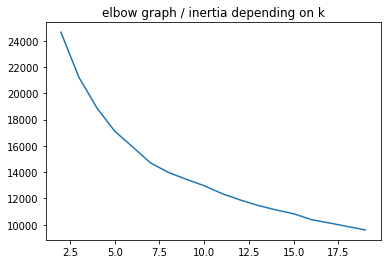

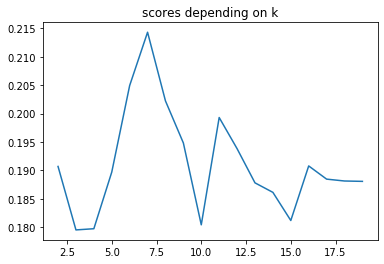

In [29]:
plot_elbow_scores(df_solar_transposed, 20)

The best nb k of clusters seems to be 7 if there isn't any real elbow on the 1st plot.

## On countries

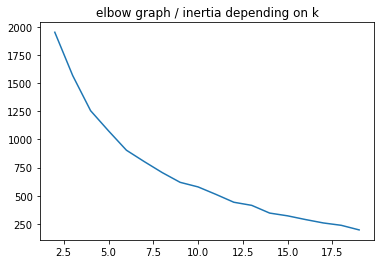

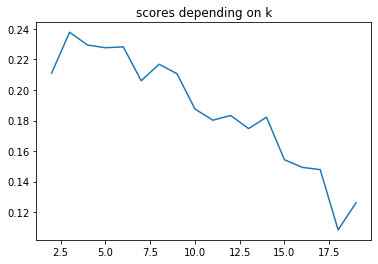

In [30]:
df_solar_transposed = df_solar_co[-24*365:].T
plot_elbow_scores(df_solar_transposed, 20)

The best nb k of clusters seems to be 6 if there isn't any real elbow on the 1st plot.

In [32]:
X = df_solar_transposed

km = KMeans(n_clusters=6).fit(X)
X['label'] = km.labels_
print("Cluster nb / Nb of countries in the cluster", X.label.value_counts())

Cluster nb / Nb of countries in the cluster 1    8
2    7
3    5
0    4
4    3
5    2
Name: label, dtype: int64


In [41]:
print("Countries grouped by cluster")
for k in range(6):
    print(f'cluster nb : {k}', " ".join(list(X[X.label == k].index)))

cluster nb : 0 CY IE NO SE
cluster nb : 1 AT CH CZ HR HU IT SI SK
cluster nb : 2 BE DE DK FR LU NL UK
cluster nb : 3 EE FI LT LV PL
cluster nb : 4 BG EL RO
cluster nb : 5 ES PT


---